In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import scipy as sp
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt

import seaborn as sns
import math
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))
%matplotlib inline

In [2]:
# Get national and provincial CSV data:

dindex_p = pd.read_csv("/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/ProvincialCSVOutput/Disparity_Index_pv.csv",encoding="latin1").set_index('csdcode')

dindex_c = pd.read_csv("/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/NationalCSVOutput/Disparity_Index_ca.csv",encoding="latin1").set_index('csdcode')

In [3]:
shp_path = "/Users/DNW/Dropbox/Rural Data Project - RA/Census Data - Raw/Shapefiles/lcsd000b16a_e/lcsd000b16a_e.shp"
sf = shp.Reader(shp_path,encoding='latin1')

In [4]:
map_df = gpd.read_file(shp_path)

In [5]:
pv_shps = (map_df
           .rename(columns={"CSDUID":"csdcode"})
           .astype({"csdcode":int})
           .set_index("csdcode")
           .merge(dindex_p,how="left",left_index=True,right_index=True))
       
#pv_shps = pv_shps.loc[pv_sphs.random.isnull(), 'random_cat'] = 'No Data'    

ca_shps = (map_df
           .rename(columns={"CSDUID":"csdcode"})
           .astype({"csdcode":int})
           .set_index("csdcode")
           .merge(dindex_c,how="left",left_index=True,right_index=True))

# Provincial

In [6]:
#pv_shps.explore(column="Disparity Index")

In [7]:
pv_plot = pv_shps.copy()
pv_plot['Disparity Index Score'] = (
                        np.where(pv_plot['Disparity Index'] == 1, "1 - Low",
                        np.where(pv_plot['Disparity Index'] == 2, "2 - Low - Moderate",
                        np.where(pv_plot['Disparity Index'] == 3, "3 - Moderate",
                        np.where(pv_plot['Disparity Index'] == 4, "4 - Moderate - High",
                        np.where(pv_plot['Disparity Index'] == 5, "5 - High", None))))))



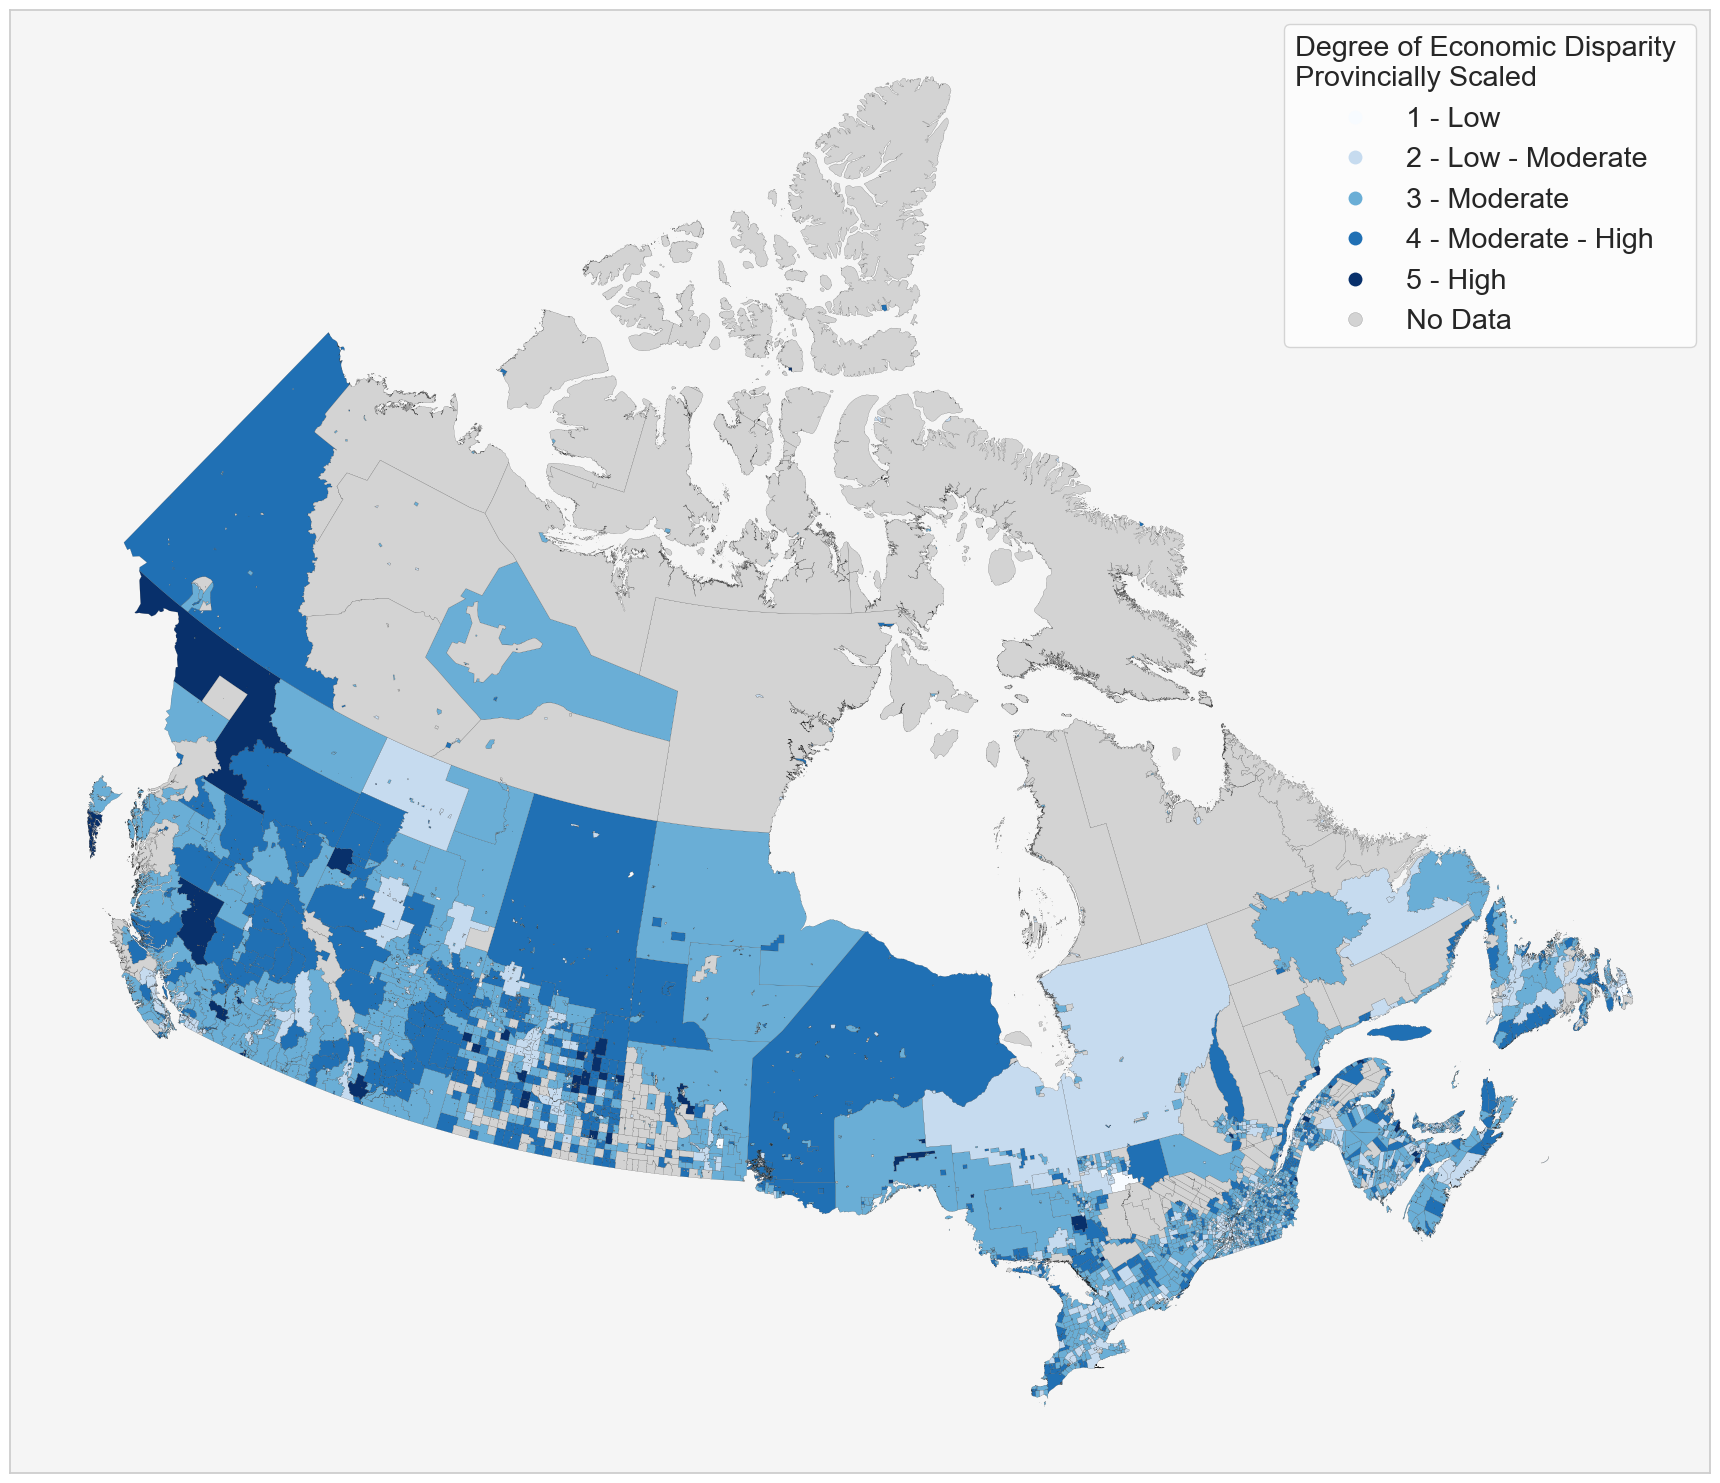

In [11]:
fig1, ax = plt.subplots(1, figsize=(24, 19))
pv_plot.plot(column="Disparity Index Score", kind="geo", cmap='Blues',
             categorical=True, legend=True,
             linewidth=0.1, ax=ax, edgecolor='0.1',
             missing_kwds={'color': 'lightgrey',
                          'label':'No Data'},
             legend_kwds={'fontsize': 'large',
                         'title': "Degree of Economic Disparity \nProvincially Scaled",
                         'title_fontsize':'xx-large',
                         'fontsize':'xx-large'})
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax.set_facecolor('whitesmoke')
ax.grid(False)
fig1.savefig("/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/Maps/Map_PRV_Index.png",
            dpi=300)

# National

In [9]:
ca_plot = ca_shps.copy()
ca_plot['Disparity Index Score'] = (
                        np.where(ca_plot['Disparity Index'] == 1, "1 - Low",
                        np.where(ca_plot['Disparity Index'] == 2, "2 - Low - Moderate",
                        np.where(ca_plot['Disparity Index'] == 3, "3 - Moderate",
                        np.where(ca_plot['Disparity Index'] == 4, "4 - Moderate - High",
                        np.where(ca_plot['Disparity Index'] == 5, "5 - High", None))))))


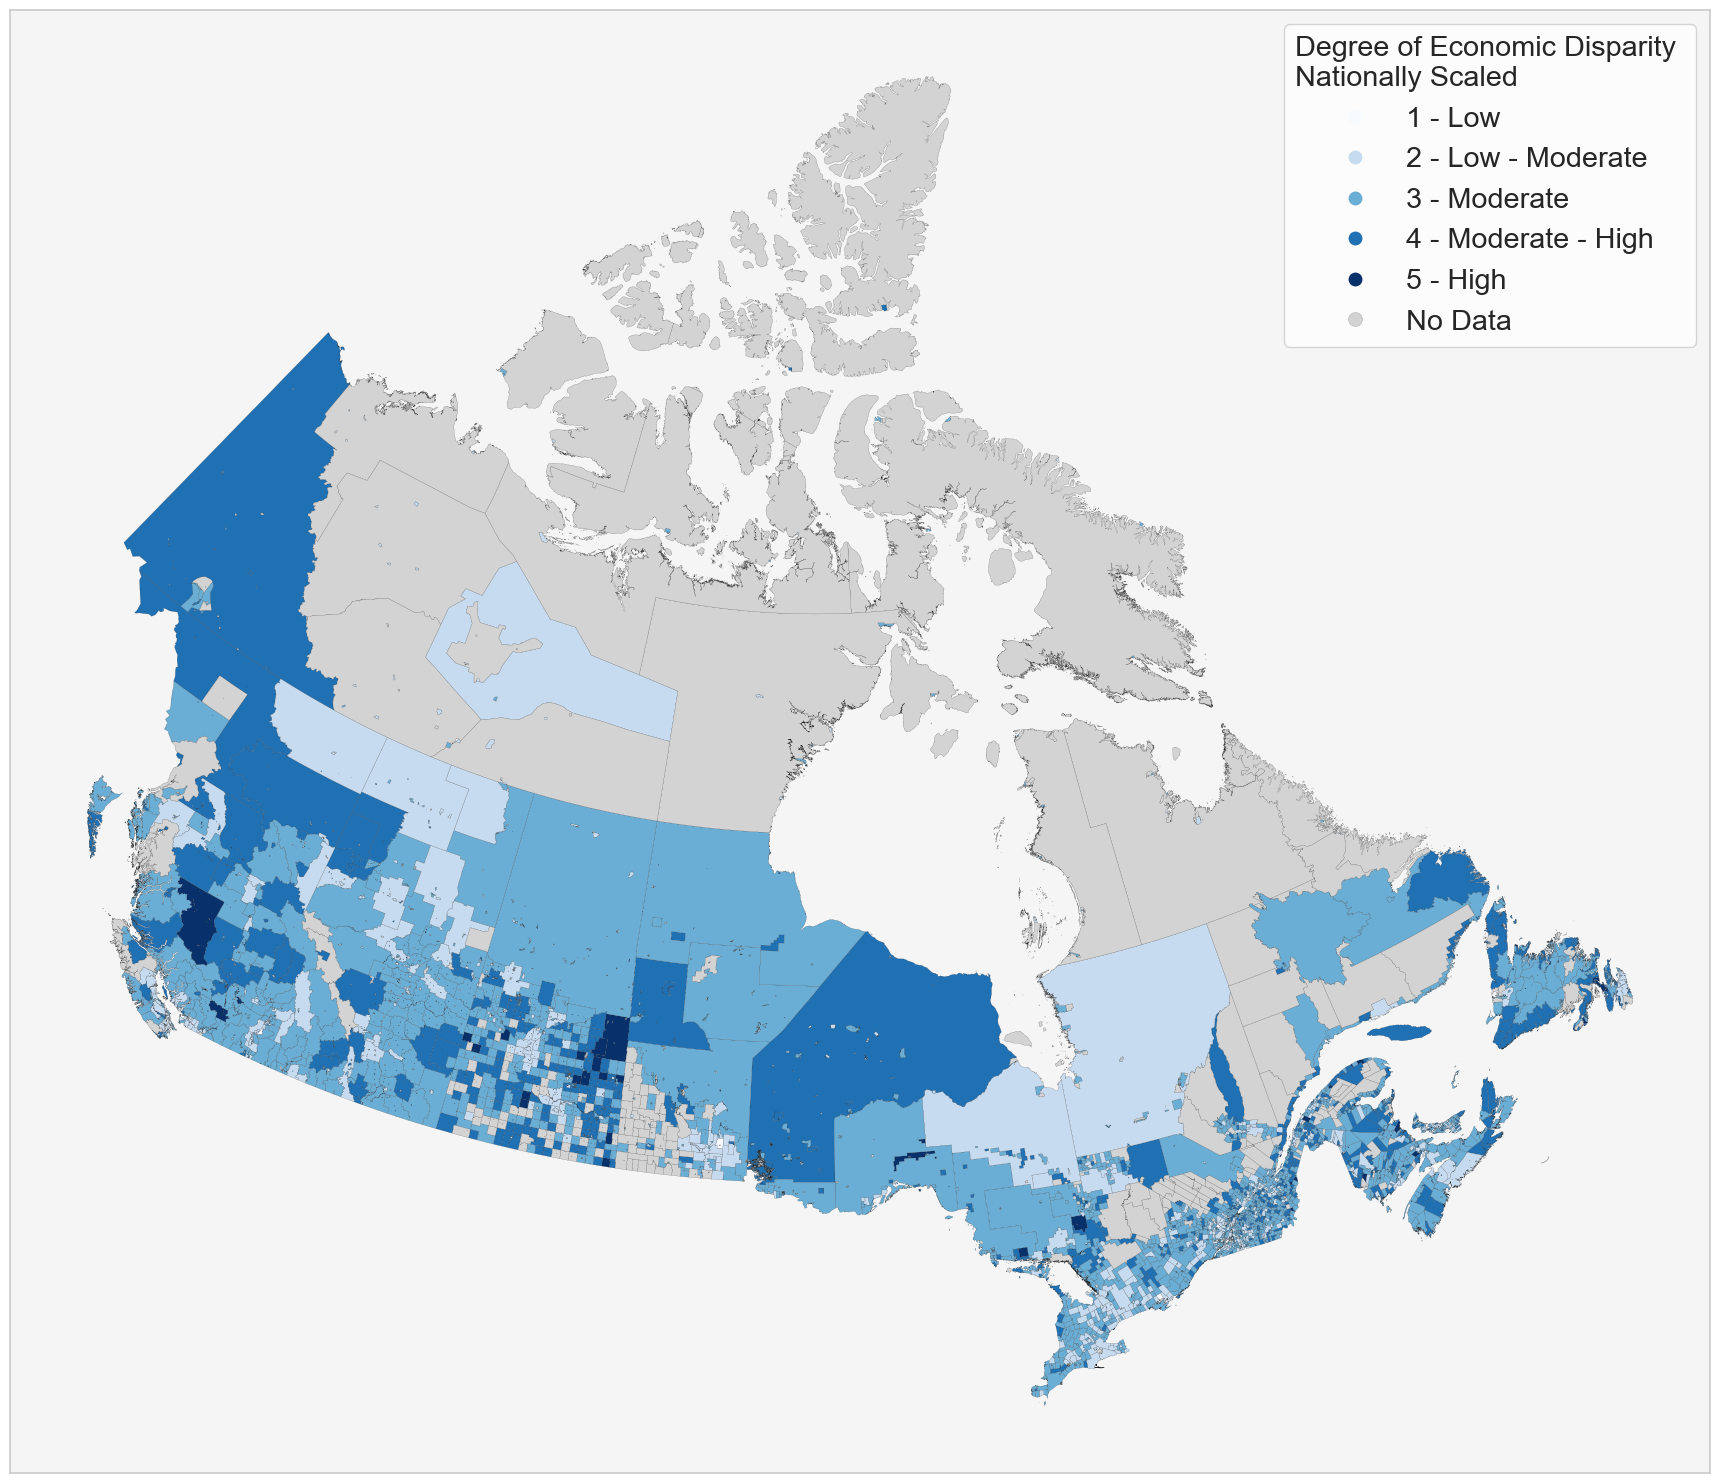

In [12]:
fig2, ax = plt.subplots(1, figsize=(24, 19))
ca_plot.plot(column="Disparity Index Score", kind="geo", cmap='Blues',
             categorical=True, legend=True,
             linewidth=0.1, ax=ax, edgecolor='0.1',
             missing_kwds={'color': 'lightgrey',
                          'label':'No Data'},
             legend_kwds={'fontsize': 'large',
                         'title': "Degree of Economic Disparity \nNationally Scaled",
                         'title_fontsize':'xx-large',
                         'fontsize':'xx-large'})
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax.set_facecolor('whitesmoke')
ax.grid(False)


fig2.savefig("/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/Maps/Map_CDN_Index.png",
            dpi=300)